# <center>**ĐỒ ÁN CUỐI KÌ MÔN LẬP TRÌNH KHOA HỌC DỮ LIỆU**</center>

---

## Import các thư viện cần thiết

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---

## __1. LẤY DỮ LIỆU__

Dữ liệu được sử dụng trong đồ án này là dữ liệu lịch sử về Thế vận hội Olympic, bao gồm tất cả các Thế vận hội đầu tiên ở Athen (1896) tới Thế vận hội Mùa hè ở Rio (2016).

Một điểm lưu ý nhỏ: Thế vận hội Mùa hè được tổ chức bắt đầu từ năm 1896, Mùa đông bắt đầu từ năm 1924. Trước năm 1994, Thế vận hội Mùa hè và Mùa đông được tổ chức  trong cùng một năm, và từ sau năm 1994, 2 Thế vận hội này được tổ chức xen kẽ nhau 2 năm/lần, thông tin từ trang [wiki](https://vi.wikipedia.org/wiki/Th%E1%BA%BF_v%E1%BA%ADn_h%E1%BB%99i).

Bộ dữ liệu được thu thập vào tháng 5/2018 từ trang gốc [này](www.sports-reference.com), được lấy từ Kaggle và tải về [ở đây](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).

---

## __2. KHÁM PHÁ DỮ LIỆU__

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
athlete_df = pd.read_csv('athlete_events.csv')
athlete_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = athlete_df.shape[0]
num_cols = athlete_df.shape[1]

In [4]:
assert num_rows == 271116
assert num_cols == 15

### Mỗi dòng và mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột trong file "athlete_events.csv":
- __ID__: Unique number for each athlete
- __Name__: Athlete's name
- __Sex__: gender - Male(M) or Female(F)
- __Age__: Athlete's age
- __Height__: Athlete's height
- __Weight__: Athlete's weight
- __Team__: Team name
- __NOC__: National Olympic Committee 3-letter code
- __Games__: Year and season
- __Year__: Year on held
- __Season__: Summer or Winter
- __City__: Host city
- __Sport__: Sport
- __Event__: Event
- __Medal__: Gold, Silver, Bronze, or NA

Nhìn vào dữ liệu ở `athlete_df`, ta có thể thấy là mỗi dòng ứng với thông tin của một vận động viên tham gia Thế vận hội.

### Mỗi cột có dtype là gì?

Ta lấy `dtype` (kiểu dữ liệu của mỗi phần tử) của mỗi cột trong `athlete_df` và lưu kết quả vào series `col_dtypes`; series này có index là tên cột. 

In [5]:
col_names = list(athlete_df.columns.values)
dtype_for_each_col = list(athlete_df.dtypes)

col_dtypes = pd.Series(dtype_for_each_col, index = col_names)
col_dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Các cột có dtype là object là gì?

`athlete_df` có 10 cột có `dtype` là `object`: "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event", "Medal". Ta sẽ xem thử mỗi cột có các kiểu dữ liệu nào.

In [6]:
def open_object_dtype(s):
    dtypes = set()
    
    # YOUR CODE HERE
    
    if s.dtype == object:
        result = s.map(type)
        for particular_type in result:
            dtypes.add(particular_type)
    
    return dtypes

In [7]:
assert open_object_dtype(athlete_df['Name']) == {str}
assert open_object_dtype(athlete_df['Sex']) == {str}
assert open_object_dtype(athlete_df['Team']) == {str}
assert open_object_dtype(athlete_df['NOC']) == {str}
assert open_object_dtype(athlete_df['Games']) == {str}
assert open_object_dtype(athlete_df['Season']) == {str}
assert open_object_dtype(athlete_df['City']) == {str}
assert open_object_dtype(athlete_df['Sport']) == {str}
assert open_object_dtype(athlete_df['Event']) == {str}
assert open_object_dtype(athlete_df['Medal']) == {str, float}

**<font color=red>Nhận xét:</font>**

- Các cột sau có `dtype` là `str`: "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event".
- Chỉ duy nhất cột "Medal" có `dtype` gồm 2 loại là: `str` và `float`. Trong đó, `float` là ứng với `NaN`, không có huy chương, `str` ứng với đạt một huy chương tại một môn thể thao nào đó.

### Cột dạng numeric có miền giá trị thế nào?

In [8]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Hiện có 5 cột dạng numeric, đó là: "ID", "Age", "Height", "Weight", "Year". Tuy nhiên là cột "ID" không có gì đáng lưu ý. Như vậy chỉ còn lại cột "Age", "Height", "Weight", và "Year". Ta sẽ tính miền giá trị (min, max) của 4 cột là "Age", "Height", "Weight", "Year", lưu kết quả vào dataframe `col_ranges_df`. Dataframe này có 2 dòng là "min", "max"; và có 2 cột là "Age", "Height", "Weight", "Year".

In [9]:
col_ranges_df = athlete_df.agg({'Age': ['min', 'max'], 'Height': ['min', 'max'], 'Weight': ['min', 'max'], 'Year': ['min', 'max']})
col_ranges_df

,Age,Height,Weight,Year
min,10.0,127.0,25.0,1896
max,97.0,226.0,214.0,2016


### Các cột dạng categorical có các giá trị nào?

`athlete_df` có 6 cột dạng categorical là "Team", "Games", "City", "Sport", "Event", "Medal". Ta tính "range" cho các cột này: số lượng các giá trị khác nhau (không tính NaN), và list gồm 3 giá trị khác nhau đầu tiên sau khi đã sort tăng dần tất cả các giá trị khác nhau. Lưu kết quả vào dataframe `cat_col_ranges_df`. Dataframe này có 2 dòng là "NumUniqueVals", "ThreeFirstVals"; và có 6 cột là "Team", "Games", "City", "Sport", "Event", "Medal".

In [10]:
cat_col_ranges_df = athlete_df.agg({ 'Team': ['nunique'], 'Games': ['nunique'], 'City': ['nunique'], 'Sport': ['nunique'], 'Event': ['nunique'], 'Medal': ['nunique']})
cat_col_ranges_df.rename(index={'nunique': 'NumUniqueVals'}, inplace=True)

new_row = pd.Series({'Team': sorted(athlete_df['Team'].dropna().unique())[:3],
                     'Games': sorted(athlete_df['Games'].dropna().unique())[:3],
                     'City': sorted(athlete_df['City'].dropna().unique())[:3],
                     'Sport': sorted(athlete_df['Sport'].dropna().unique())[:3],
                     'Event': sorted(athlete_df['Event'].dropna().unique())[:3],
                     'Medal': sorted(athlete_df['Medal'].dropna().unique())[:3]}, name='ThreeFirstVals')

cat_col_ranges_df = cat_col_ranges_df.append(new_row)
cat_col_ranges_df

,Team,Games,City,Sport,Event,Medal
NumUniqueVals,1184,51,42,66,765,3
ThreeFirstVals,"[30. Februar, A North American Team, Acipactli]","[1896 Summer, 1900 Summer, 1904 Summer]","[Albertville, Amsterdam, Antwerpen]","[Aeronautics, Alpine Skiing, Alpinism]","[Aeronautics Mixed Aeronautics, Alpine Skiing ...","[Bronze, Gold, Silver]"


### Mỗi cột có bao nhiêu giá trị thiếu?

Tính số lượng giá trị thiếu của mỗi cột và lưu kết quả vào series `col_num_nans`, trong đó index là tên cột, series này chỉ hiển thị các cột có giá trị thiếu.

In [11]:
list_data = []
list_index = []

for name in col_names:
    result = athlete_df[name].isna().sum()
    if result > 0:
        list_data.append(result)
        list_index.append(name)

col_num_nans = pd.Series(list_data, index=list_index)
col_num_nans

Age         9474
Height     60171
Weight     62875
Medal     231333
dtype: int64

---

## __4. CÁC CÂU HỎI CẦN TRẢ LỜI VÀ TẠI SAO MỖI CÂU HỎI ĐÓ CÓ Ý NGHĨA__

Sau khi khám phá và hiểu hơn về dữ liệu, có một số câu hỏi có thể trả lời được bằng dữ liệu như sau:

- Số lượng vận động viên (VĐV) tham gia mỗi mùa Olympic thay đổi như thế nào theo năm, và có sự khác biệt nào giữa số VĐV Mùa hè và Mùa đông (từ sau năm 1992)?
    - *Ý nghĩa*: câu hỏi này giúp ta cái nhìn tổng quan về các mùa Thế vận hội phát triển như thế nào theo thời gian như là quy mô, số lượng môn thể thao,...
    
    
- Với các VĐV tham gia mỗi năm, tỉ lệ nữ VĐV tham gia Olympic tính đến năm 2016 là bao nhiêu?
    - *Ý nghĩa*: câu hỏi này cho ta thấy rằng liệu theo thời gian, phụ nữ có thể tham gia cạnh tranh các môn thể thao như những đàn ông hay không, từ đó cho thấy khả năng cũng như sự bình đẳng giữa nam và nữ trong xã hội.
    
    
- Trong mỗi năm, "Team" nào có nhiều huy chương nhất và "Team" nào có ít huy chương nhất?
    - *Ý nghĩa*: câu hỏi này xác định nước nào (hay đội nào) có thành tích cao nhất, thấp nhất. Cho thấy sự đầu tư, chú trọng về con người cũng như là sự phát triển mạnh mẽ về kinh tế, khoa học của nước đó qua mỗi năm đối với Đại hội thể thao lớn nhất hành tinh này.
    
    
- Trong 3 năm gần đây, đối với Mùa đông (2014, 2010, 2006) và Mùa hè (2016, 2012, 2008), 10 đội nào tham gia nhiều môn thể thao nhất?
    - *Ý nghĩa*: câu hỏi này cho thấy đội nào có tham vọng, quyết tâm, thể hiện thế mạnh khi muốn đạt được nhiều thành tích nhất có thể trong 3 năm gần đây nhất, chia thành 2 mùa: mùa đông và mùa hè.
    
    
- Trong mỗi năm, số lượng huy chương mà đội Mỹ đoạt được thay đổi như thế nào theo mùa?
    - *Ý nghĩa*: câu hỏi này cho ta thấy thành tích của đội Mỹ thể hiện qua từng năm theo mùa, liệu đội Mỹ có thiên về thể thao mùa nào hơn hay không, hay đều chú trọng cả 2.

---

## __5. CÂU TRẢ LỜI CHO CÁC CÂU HỎI__

### Số lượng VĐV tham gia mỗi mùa Olympic thay đổi như thế nào theo năm, và có sự khác biệt nào giữa Mùa hè và Mùa đông (từ sau năm 1992)?

Để trả lời câu hỏi này, ta thực hiện các bước sau:
- Bước 1: Tính số VĐV tham gia Olympic của mỗi năm. Lưu kết quả vào series `num_athletes_each_year`, trong đó index là năm.
- Bước 2: Từ kết quả ở trên, ta vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là số lượng VĐV, dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Year" và tên trục tung là "NumAthletes".

Code bước 1:

In [12]:
num_athletes_each_year = athlete_df['Year'].value_counts().sort_index()
num_athletes_each_year

1896      380
1900     1936
1904     1301
1906     1733
1908     3101
1912     4040
1920     4292
1924     5693
1928     5574
1932     3321
1936     7401
1948     7480
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Year, dtype: int64

Code bước 2:

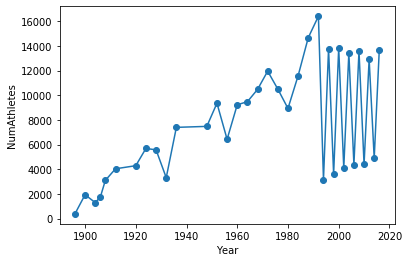

In [13]:
num_athletes_each_year.plot.line(marker = 'o')
plt.xlabel('Year')
plt.ylabel('NumAthletes');

**<font color=red>Nhận xét:</font>**

- Nhìn chung, qua các năm thì số lượng vận động viên tham gia Olympic ngày càng nhiều.
- Từ năm 1994 trở đi, số lượng vận động viên tham gia Olympic Mùa hè lại đông hơn nhiều so với Olympic Mùa đông, có thể do số lượng môn thể thao ở Mùa hè nhiều hơn so với Mùa đông.

### Với các VĐV tham gia mỗi năm, tỉ lệ nữ VĐV tham gia Olympic tính đến năm 2016 là bao nhiêu?

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Tính tỉ lệ (từ 0 đến 1) nữ VĐV của mỗi năm (năm ở đây là năm diễn ra Thế vận hội). Lưu kết quả vào series `women_ratio_each_year`, trong đó index là năm.
- Bước 2: Từ kết quả ở trên, vẽ đồ thị dạng line, trong đó trục hoành là năm và trục tung là tỉ lệ bị bắt. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu, đặt tên trục hoành là "Year" và tên trục tung là "WomenRatio". Ngoài ra, chỉnh miền giá trị của trục tung là từ 0 đến 1.

Code bước 1:

In [14]:
women_each_year = athlete_df.groupby(['Sex', 'Year'])['Sex'].count().unstack().fillna(0).stack()

women_ratio_each_year = women_each_year['F'].div(num_athletes_each_year)
women_ratio_each_year

Year
1896    0.000000
1900    0.017045
1904    0.012298
1906    0.006347
1908    0.015156
1912    0.021535
1920    0.031221
1924    0.045846
1928    0.078400
1932    0.111111
1936    0.074179
1948    0.101738
1952    0.179739
1956    0.177028
1960    0.187331
1964    0.184810
1968    0.209276
1972    0.218078
1976    0.248143
1980    0.244601
1984    0.257421
1988    0.287749
1992    0.315482
1994    0.349684
1996    0.363425
1998    0.383911
2000    0.392953
2002    0.385009
2004    0.412557
2006    0.400958
2008    0.427584
2010    0.419582
2012    0.450077
2014    0.413617
2016    0.454632
dtype: float64

Code bước 2:

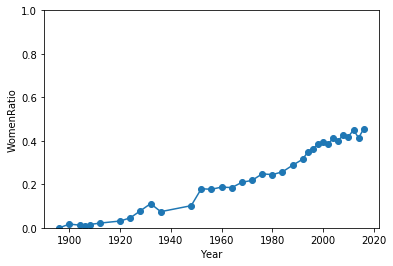

In [15]:
women_ratio_each_year.plot.line(marker = 'o')
plt.xlabel('Year')
plt.ylabel('WomenRatio')
plt.ylim(0, 1);

**<font color=red>Nhận xét:</font>**

- Nhìn chung qua các năm, số lượng VĐV nữ tham gia Olympic ngày càng nhiều. Có thể nhờ sự bình đẳng giới giữa nam và nữ mà các nữ VĐV ngày càng khẳng định vị thế của mình trước nam giới trong tất cả các môn thể thao Mùa hè và Mùa đông.
- Năm đầu tiên tổ chức không hề có nữ VĐV nào tham gia, những năm gần đây thì số lượng nữ VĐV gần xấp xỉ với nam VĐV.

###  Trong mỗi năm, "Team" nào có nhiều huy chương nhất và "Team" nào có ít huy chương nhất?

Ta lưu kết quả vào dataframe `two_teams_each_year_df`. Dataframe này sẽ có 2 cột là "TeamHasTheLeastMedal" (các "Team" có ít huy chương nhất) và "TeamHasTheMostMedal" (các "Team" có nhiều huy chương nhất) và có số dòng ứng với mỗi năm diễn ra Olympic.

In [16]:
list_years = sorted(athlete_df['Year'].unique()) # get list unique year and sort.
numMedal_each_team_each_year = athlete_df.groupby(['Year', 'Team', 'Medal'])['Team'].count()

list_team_minMedal_each_year = []
list_team_maxMedal_each_year = []

for year in list_years:
    result = numMedal_each_team_each_year[year].groupby('Team').sum()
    
    list_team_minMedal_each_year.append(list(result[result == result.min()].index))
    list_team_maxMedal_each_year.append(list(result[result == result.max()].index))

two_teams_each_year_df = pd.DataFrame({'TeamHasTheLeastMedal': list_team_minMedal_each_year, 'TeamHasTheMostMedal': list_team_maxMedal_each_year}, index=list_years)
two_teams_each_year_df

,TeamHasTheLeastMedal,TeamHasTheMostMedal
1896,"[Australia, Australia/Great Britain, Ethnikos ...",[Greece]
1900,"[Belgium-1, Brynhild-2, Carabinier-15, Cicely-...",[France]
1904,[France],[United States]
1906,"[Canada, Greece-2]",[France]
1908,"[Austria, Camille]",[Great Britain]
1912,[England],[Sweden]
1920,"[Luxembourg, New Zealand]",[United States]
1924,"[Greece, Japan, Monaco, Nepal, New Zealand]",[United States]
1928,"[Chile, Haiti, Ireland, Luxembourg, New Zealan...",[United States]
1932,"[Belgium, Latvia, Spain, Switzerland, Uruguay]",[United States]


**<font color=red>Nhận xét:</font>**

- Nhìn sơ qua, ta thấy rằng nước Mỹ có số lần đoạt được nhiều huy chương nhất, có thể do công nghệ khoa học phát triển nhờ tránh được thiệt hại cũng như thu lợi nhuận được từ chiến tranh thế giới, số lượng người dân lớn nên nước này có thành tích đáng ngưỡng mộ như thế.
- Ta thấy khoảng cách giữa 2 kì Olympic liên tiếp là 1912-1920 và 1936-1948 cách nhau lần lượt là 8 và 12 năm, tại sao lại vậy? Là do 2 cuộc chiến tranh thế giới diễn ra ở khoảng thời gian này nên Olympic đã được tạm hoãn, dời lại phía sau.

### Trong 3 năm gần đây, đối với Mùa đông (2014, 2010, 2006) và Mùa hè (2016, 2012, 2008), 10 đội nào tham gia nhiều môn thể thao nhất?

Ta lưu kết quả vào dataframe `top5_teams_participate_winter_and_summer_df`. Dataframe này sẽ có 10 cột và 2 dòng: 5 cột tương ứng với 10 đội có số lượng VĐV tham gia nhiều môn thể thao nhất giảm dần và 2 dòng tương ứng với 2 mùa: mùa đông và mùa hè.

In [17]:
list_years_winter_summer = athlete_df.groupby('Season').Year.apply(lambda x: list(np.unique(x))) # get all of years based on winter and summer

numRecentYears = 3 # this number can be changed when neccessary
topn = 10
list_recent_years_winter = sorted(list_years_winter_summer['Winter'], reverse=True)[:numRecentYears]
list_recent_years_summer = sorted(list_years_winter_summer['Summer'], reverse=True)[:numRecentYears]

count_sports_each_team_join = athlete_df.groupby(['Year', 'Team'])['Team'].count()

def topTeamsParticipate(list_years_of_season):
    result = count_sports_each_team_join[list_years_of_season[0]]
    
    for year in list_years_of_season[1:]:
        result = result.add(count_sports_each_team_join[year], fill_value=0)
    
    return list(result.sort_values(ascending=False).head(topn).index)

top10_teams_summer = topTeamsParticipate(list_recent_years_summer)
top10_teams_winter = topTeamsParticipate(list_recent_years_winter)

In [18]:
top5_teams_participate_winter_and_summer_df = pd.DataFrame(data=[top10_teams_summer, top10_teams_winter], index=['Summer', 'Winter'], columns=[x+1 for x in range(topn)])
top5_teams_participate_winter_and_summer_df

,1,2,3,4,5,6,7,8,9,10
Summer,United States,China,Australia,Germany,Great Britain,Russia,France,Japan,Italy,Canada
Winter,United States,Canada,Russia,Germany,Italy,Norway,Switzerland,France,Japan,Czech Republic


**<font color=red>Nhận xét:</font>**

- Mỹ luôn dẫn đầu về số lượng VĐV tham gia Olympic cả thể thao mùa đông và mùa hè.
- Nhật Bản là nước châu Á duy nhất lọt top 10 có số lượng VĐV tham gia cả 2 loại thể thao mùa đông và mùa hè.
- Trung Quốc cũng đang cho thấy khả năng về việc cạnh tranh huy chương với các cường quốc phương Tây khác.

### Trong mỗi năm, số lượng huy chương mà đội Mỹ đoạt được thay đổi như thế nào theo mùa?

Trước khi trả lời cho câu hỏi này, ta thực hiện kiểm tra lại các năm theo mùa mà đội Mỹ tham gia Olympic.

In [66]:
teams_each_year = athlete_df.groupby(['Season', 'Year', 'Team'])['Team'].count()

list_years_winter = sorted(list_years_winter_summer['Winter'])
list_years_summer = sorted(list_years_winter_summer['Summer'])

print('WINTER')
for year in list_years_winter:
    print(f'{year}:', 'United States' in temp['Winter', year].index)

print('SUMMER')
for year in list_years_summer:
    print(f'{year}:', 'United States' in temp['Summer', year].index)

WINTER
1924: True
1928: True
1932: True
1936: True
1948: True
1952: True
1956: True
1960: True
1964: True
1968: True
1972: True
1976: True
1980: True
1984: True
1988: True
1992: True
1994: True
1998: True
2002: True
2006: True
2010: True
2014: True
SUMMER
1896: True
1900: True
1904: True
1906: True
1908: True
1912: True
1920: True
1924: True
1928: True
1932: True
1936: True
1948: True
1952: True
1956: True
1960: True
1964: True
1968: True
1972: True
1976: True
1980: False
1984: True
1988: True
1992: True
1996: True
2000: True
2004: True
2008: True
2012: True
2016: True


Như vậy là đội Mỹ năm nào cũng tham gia Olympic (trừ Olympic Mùa hè năm 1980), như vậy ta sẽ có cái nhìn tổng quát được sự biến động đoạt được huy chương của đội Mỹ.

Để trả lời cho câu hỏi này, ta sẽ làm như sau:
- Bước 1: Ta tính số lượng huy chương mà đội Mỹ đạt được theo mùa của mỗi năm, lưu kết quả vào 2 series là `numMedalsWinter` và `numMedalsSummer` lần lượt là số huy chương qua mỗi năm theo Mùa đông và Mùa hè.
- Bước 2: Từ kết quả ở trên, ta vẽ 2 đồ thị dạng line, trong đó trục hoành là năm và trục tung là số huy chương đạt được. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu, đặt tên trục tung của đồ thị biễu diễn huy chương Mùa hè là "NumMedalOnSummer" và Mùa đông là "NumMedalOnWinter".

In [68]:
list_years_winter = sorted(list_years_winter_summer['Winter'])
list_years_summer = sorted(list_years_winter_summer['Summer'])

num_medals_each_season_each_year = athlete_df.groupby(['Season', 'Year', 'Team'])['Medal'].count().unstack().fillna(0).stack()

list_num_medals_winter = []
list_num_medals_summer = []

for year in list_years_winter:
    list_num_medals_winter.append(num_medals_each_season_each_year['Winter', year, 'United States'])

for year in list_years_summer:
    list_num_medals_summer.append(num_medals_each_season_each_year['Summer', year, 'United States'])

numMedalsWinter = pd.Series(list_num_medals_winter, index=list_years_winter)
numMedalsSummer = pd.Series(list_num_medals_summer, index=list_years_summer)

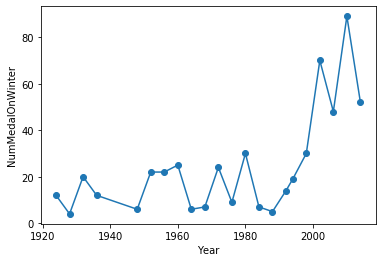

In [45]:
numMedalsWinter.plot.line(marker='o')
plt.xlabel('Year')
plt.ylabel('NumMedalOnWinter');

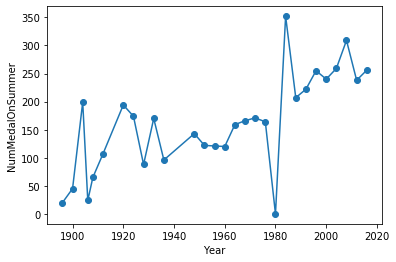

In [44]:
numMedalsSummer.plot.line(marker='o')
plt.xlabel('Year')
plt.ylabel('NumMedalOnSummer');

**<font color=red>Nhận xét:</font>**

- Nhìn chung, số lượng huy chương đội Mỹ đạt được vẫn có xu hướng tăng qua các năm lẫn Mùa đông và Mùa hè, vẫn là đội mạnh trên đấu trường.
- Mỹ không tham gia Olympic Mùa hè 1980 bởi vì Đại hội được tổ chức ở Moskva (Liên Xô lúc bấy giờ), mà lúc này là thời gian chiến tranh lạnh giữa Liên Xô và Hoa Kỳ (1947 - 1991).

---

## __6. QUÁ TRÌNH LÀM ĐỒ ÁN__

Việc khó khăn ngay từ khi bắt đầu chọn dữ liệu nào để bắt đầu phân tích, cần thỏa mãn đầy đủ các yếu tố như: ...

---

## __7. TÀI LIỆU THAM KHẢO__

https://stackoverflow.com/questions/50078524/pandas-groupby-0-value-if-does-not-exist

https://stackoverflow.com/questions/36106490/how-to-get-unique-values-from-multiple-columns-in-a-pandas-groupby